# Part I - (ford go bike-trip)
## by (Aboubacar SAWADOGO)

## Introduction
>  cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.Il est contenu dans un fichier 201902-fordgobike-tripdata.csvtéléchargé depuis https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [32]:
# charger l'ensemble de données dans une base de données pandas 
df = pd.read_csv(  '201902-fordgobike-tripdata.csv') 

In [14]:
# aperçu de notre base de données 
print(df.shape)
print('\n')
print(df.dtypes)
print('\n')
df.head(10)

(183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object




,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [13]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df['start_station_name'].value_counts()

Market St at 10th St                                               3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3544
Berry St at 4th St                                                 3052
Montgomery St BART Station (Market St at 2nd St)                   2895
Powell St BART Station (Market St at 4th St)                       2760
San Francisco Ferry Building (Harry Bridges Plaza)                 2710
San Francisco Caltrain (Townsend St at 4th St)                     2703
Powell St BART Station (Market St at 5th St)                       2327
Howard St at Beale St                                              2293
Steuart St at Market St                                            2283
The Embarcadero at Sansome St                                      2082
Bancroft Way at Telegraph Ave                                      1796
Bancroft Way at College Ave                                        1770
2nd St at Townsend St                                           

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> 
    La structure du jeu de données contient 16 colonnes et 183 412 lignes.
    La plupart des variables sont de nature numérique.

### What is/are the main feature(s) of interest in your dataset?

> Nous avons trois principaux domaines de fonctionnalités qui sont :
  - durée du trajet (temps)
  - sexe du membre
  - âge du membre


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>   
    - user_type
    - bike_share_for_all_trip
    - member_gender
    - member_birth_year ( age)
    - duration_sec (duration minutes / hours )

# Explorons de manière aprofondit les données

In [18]:
#aperçu statistique des données

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165
std,27.370082,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


In [7]:
#toutes les colonnes de notre ensemeble de données
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
#informations sur chaque colonne

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


Nous remarquons que certaines colonnes ont des valeurs manquantes

Etudions celà

In [18]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Nous remarquons effectivement que nous avons 04 colones avec des valeurs manquantes.
Nous allons nous en charger dans la partie nettoyage de données.

In [19]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

# Nettoyons les données


In [20]:
#effectuons une copie de notre base de données
FordGoBike_sauvegarde=df.copy()

In [ ]:
FordGoBike_sauvegarde.to_csv('FordGoBike_sauvegarde.csv')

In [33]:
#effacons les valeurs nulles

df.dropna(axis=0,inplace=True)

In [22]:
#verifions

df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
#les durées ont des valeurs trop grandes vu qu'elles sont en secondes,
#convertissons les en minutes et changeons le type

In [34]:
#convertissons le type de star_time et end_time

df['start_time'] = pd.to_datetime(df['start_time'])
df["end_time"] = pd.to_datetime(df["end_time"])

In [35]:
#changeons la durée en minutes

df['duration_sec'] = df['duration_sec']/60

In [36]:
#avoir des durée en heure
df['duration_hour'] = df['duration_sec']/60


In [ ]:
#Il serait interessant d'avoir une colonne avec l'heure de debut

In [37]:
#renommons la colonne duration-sec en duration_min vu qu'on a converti en min

df.rename(columns= {"duration_sec":"duration_min"}, inplace = True )

In [12]:
#testons les changements

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_min               183412 non-null float64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_hour              183412 non-null float64
dtypes: float64(9), int64(1), o

In [22]:
df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733379,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165
std,27.370082,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000
50%,8.500000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000


In [31]:
#l'année minimale de naissance est 1878, un peu trop vieux non??
#nous pouvons considerer cela comme étant des valeures abérrantes et les supprimé
#nous allons fixer la limite à 85 pour ne pas trop exageré

#considerons 1934 comme année minimale de naissance
Age=df[df.member_birth_year < 1934]
Age

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,0.041111,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
5197,0.060278,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No
5266,0.106667,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No
5447,0.040833,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No
10827,0.365278,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,0.314167,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
17981,0.101667,2019-02-26 19:53:38.528,2019-02-26 19:59:44.968,50.0,2nd St at Townsend St,37.780526,-122.390288,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No
18885,0.120000,2019-02-26 17:48:59.016,2019-02-26 17:56:11.370,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No
19375,0.178056,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No
20743,0.105556,2019-02-26 10:57:07.767,2019-02-26 11:03:28.196,26.0,1st St at Folsom St,37.787290,-122.394380,61.0,Howard St at 8th St,37.776513,-122.411306,5387,Subscriber,1933.0,Female,Yes


In [38]:
#faisons le netoyage

df.drop(df[(df.member_birth_year < 1934 )].index, inplace = True)

In [13]:
#test

df.describe()

,duration_min,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174765.000000,174765.000000,174765.000000,174765.000000,174765.000000,174765.000000,174765.000000,174765.000000,174765.000000
mean,11.738381,139.022110,37.771203,-122.351719,136.642297,37.771398,-122.351295,4482.302635,1984.873390
std,27.383484,111.648301,0.100441,0.117774,111.349664,0.100345,0.117337,1659.222103,9.881006
min,1.016667,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1934.000000
25%,5.383333,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,8.516667,104.000000,37.780787,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,13.150000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.285633,5505.000000,1992.000000
max,1409.133333,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [39]:
#Inserons une colonne contenant l'age pour une meilleure analyse

df['Age'] = 2019 - df.member_birth_year

In [34]:
#verifions
df.Age.head()

0    35.0
2    47.0
3    30.0
4    45.0
5    60.0
Name: Age, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174765 entries, 0 to 183411
Data columns (total 17 columns):
duration_min               174765 non-null float64
start_time                 174765 non-null datetime64[ns]
end_time                   174765 non-null datetime64[ns]
start_station_id           174765 non-null float64
start_station_name         174765 non-null object
start_station_latitude     174765 non-null float64
start_station_longitude    174765 non-null float64
end_station_id             174765 non-null float64
end_station_name           174765 non-null object
end_station_latitude       174765 non-null float64
end_station_longitude      174765 non-null float64
bike_id                    174765 non-null int64
user_type                  174765 non-null object
member_birth_year          174765 non-null float64
member_gender              174765 non-null object
bike_share_for_all_trip    174765 non-null object
Age                        174765 non-null float64
dtypes: datetim


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: price.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Quelle est la distribution en fonction du type d'utilisateur ?

In [37]:
df['user_type'].value_counts()

Subscriber    158206
Customer       16559
Name: user_type, dtype: int64

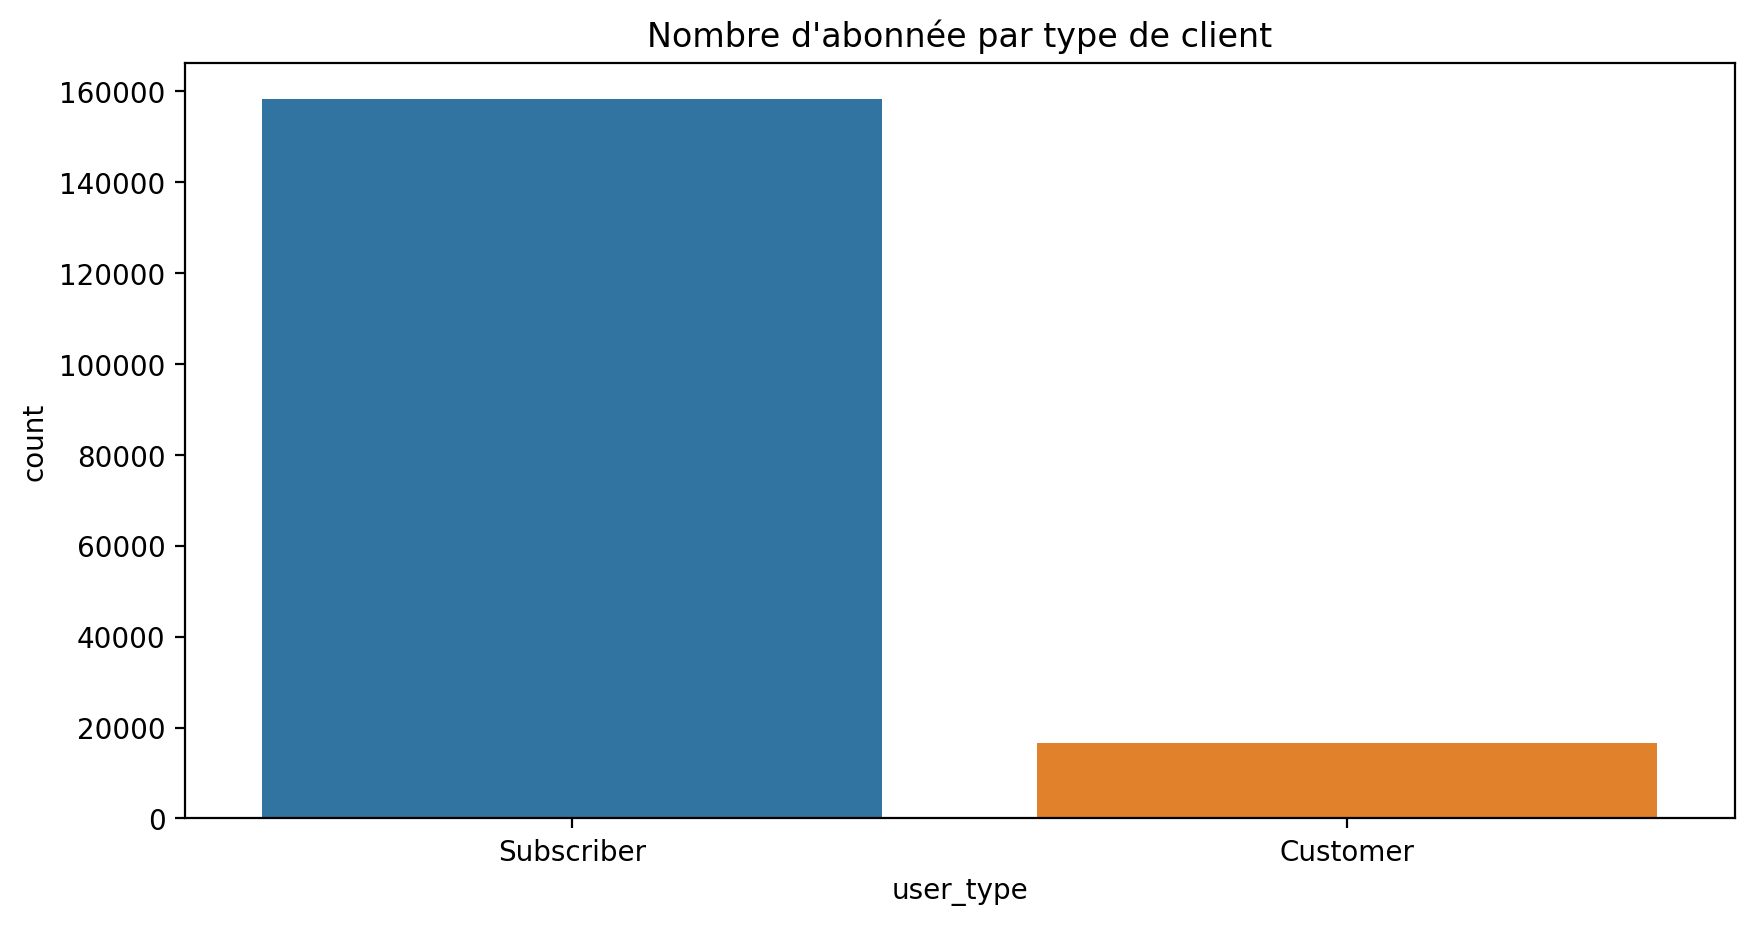

In [46]:
#definisons une fonction pour countplot 

def notre_countplot(column, titre) :
    plt.figure(figsize = (10,5), dpi = 200)
    sb.countplot(data = df, x = column , order = df[column].value_counts().index);
    plt.title(titre);
    
    
notre_countplot('user_type',"Nombre d'abonnée par type de client")



Subscriber :   158206
Customer   :    16559

La grande partie des utilisateurs sont des abonnées

### Quelle est la distribution des utilisateur sur le partage tout le trajet ?

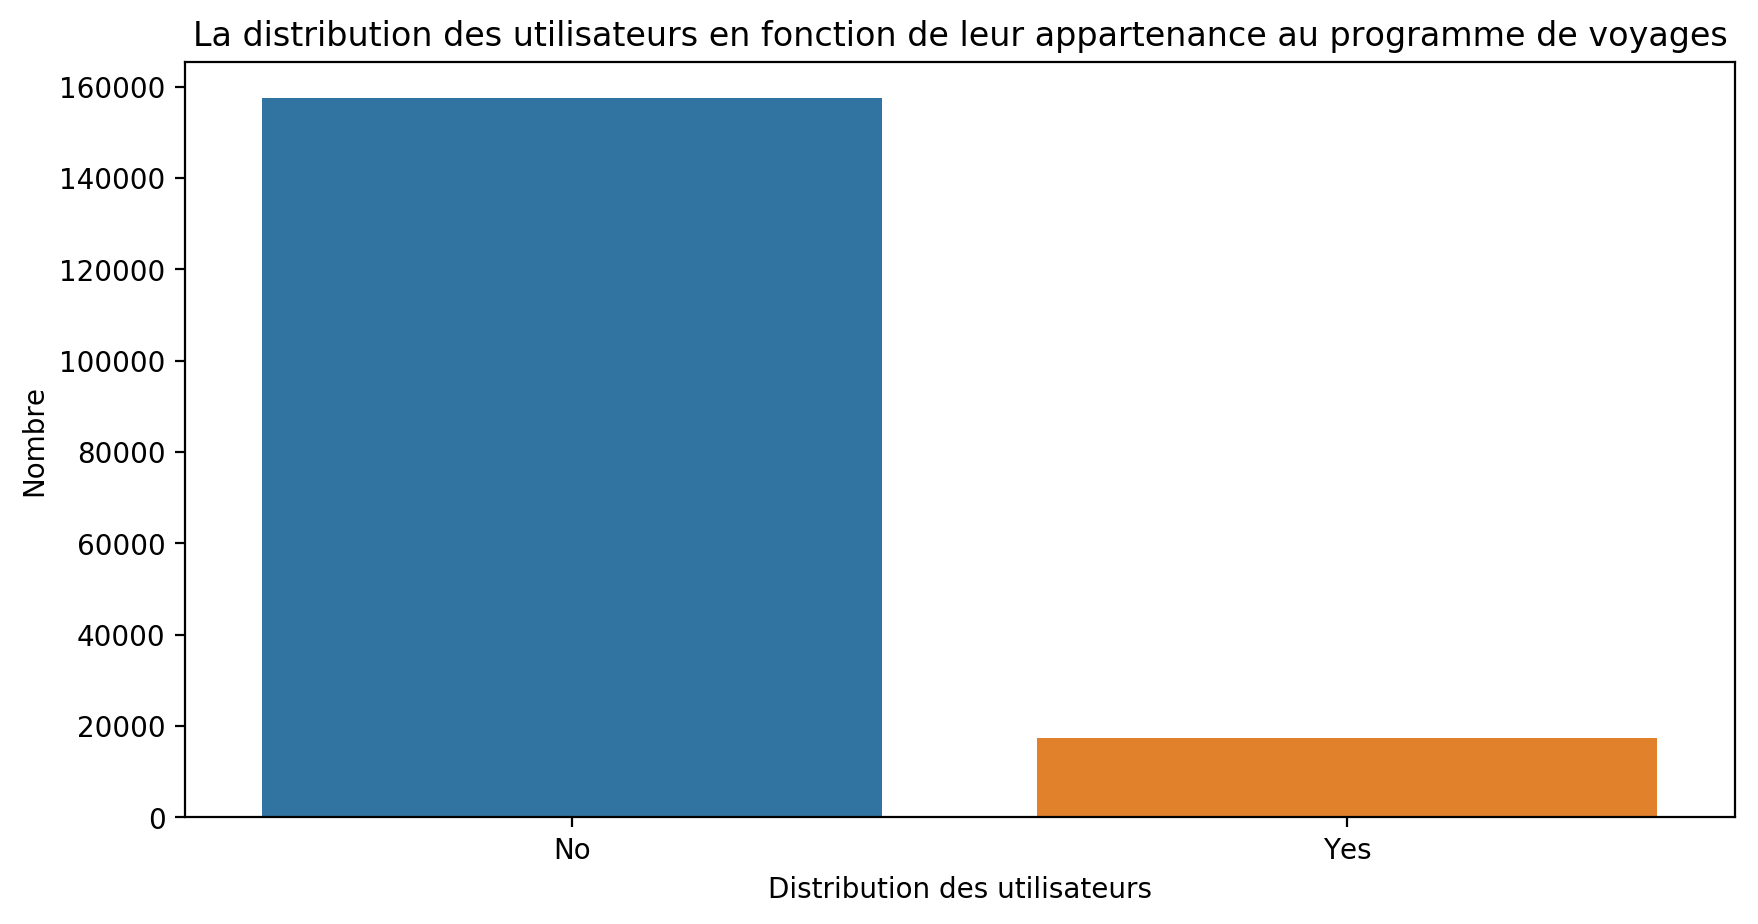

In [47]:
notre_countplot('bike_share_for_all_trip',"La distribution des utilisateurs en fonction de leur appartenance au programme de voyages")

plt.xlabel('Distribution des utilisateurs')
plt.ylabel('Nombre')
plt.show()

Le graphique ci-dessus montre que la majorité des utilisateurs ne font pas partie du programme de voyages.

###  Quelle est la distribution en fonction de l'Age ?

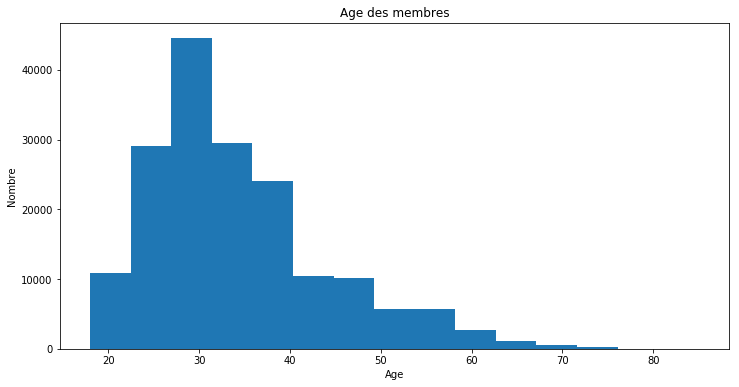

In [45]:
plt.figure(figsize=(12,6))
plt.hist(df['Age'],bins = 15);
plt.title('Age des membres');
plt.xlabel('Age');
plt.ylabel('Nombre');

La plupart des utilisateurs de vélo ont environ entre 20 et 50 ans.
La majorité a environ 30 ans.

### Quelle est la distribution en fonction du Genre ?

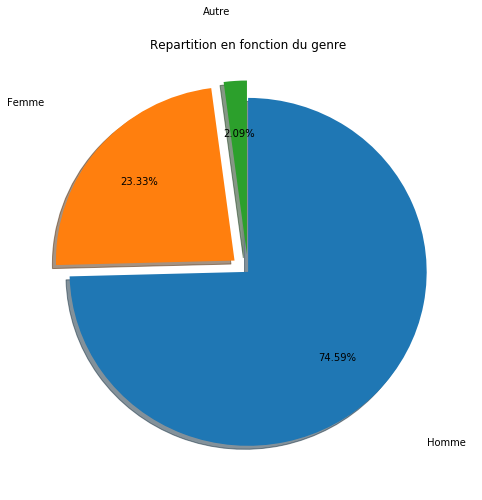

In [14]:
plt.figure(figsize=(8,8))
Gender_counts = df['member_gender'].value_counts()

plt.pie(Gender_counts, labels = ['Homme','Femme','Autre'], startangle = 90,explode =(0 , 0.1, 0.1)  ,
        counterclock = False,autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4,
           shadow = True);
plt.title("Repartition en fonction du genre");

74,59 % des utilisateurs sont des hommes, suivi de 23,33 % de femmes
Les autres utilisateurs sont en nombre infime voir 2,09 %

### Quelle est la distribution pour la durée en minute?

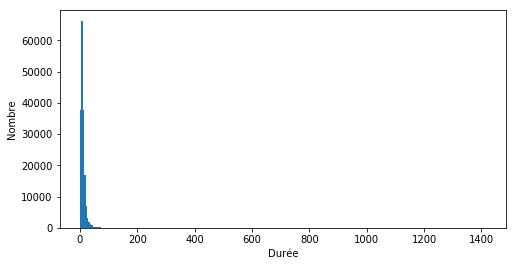

In [112]:
binsize = 8
bins = np.arange(0, df['duration_min'].max()+binsize, 5)

plt.figure(figsize=[8, 4])

plt.hist(data = df, x = 'duration_min', bins=bins);


plt.xlabel('Durée');
plt.ylabel('Nombre');

La durée en minutes des trajets est pour la plupart comprise entre 3 min  et 16 min ce qui signifie que la plupart des trajets durent moins de 15 minutes ! 

### Quelle est la distribution pour la durée en heure?

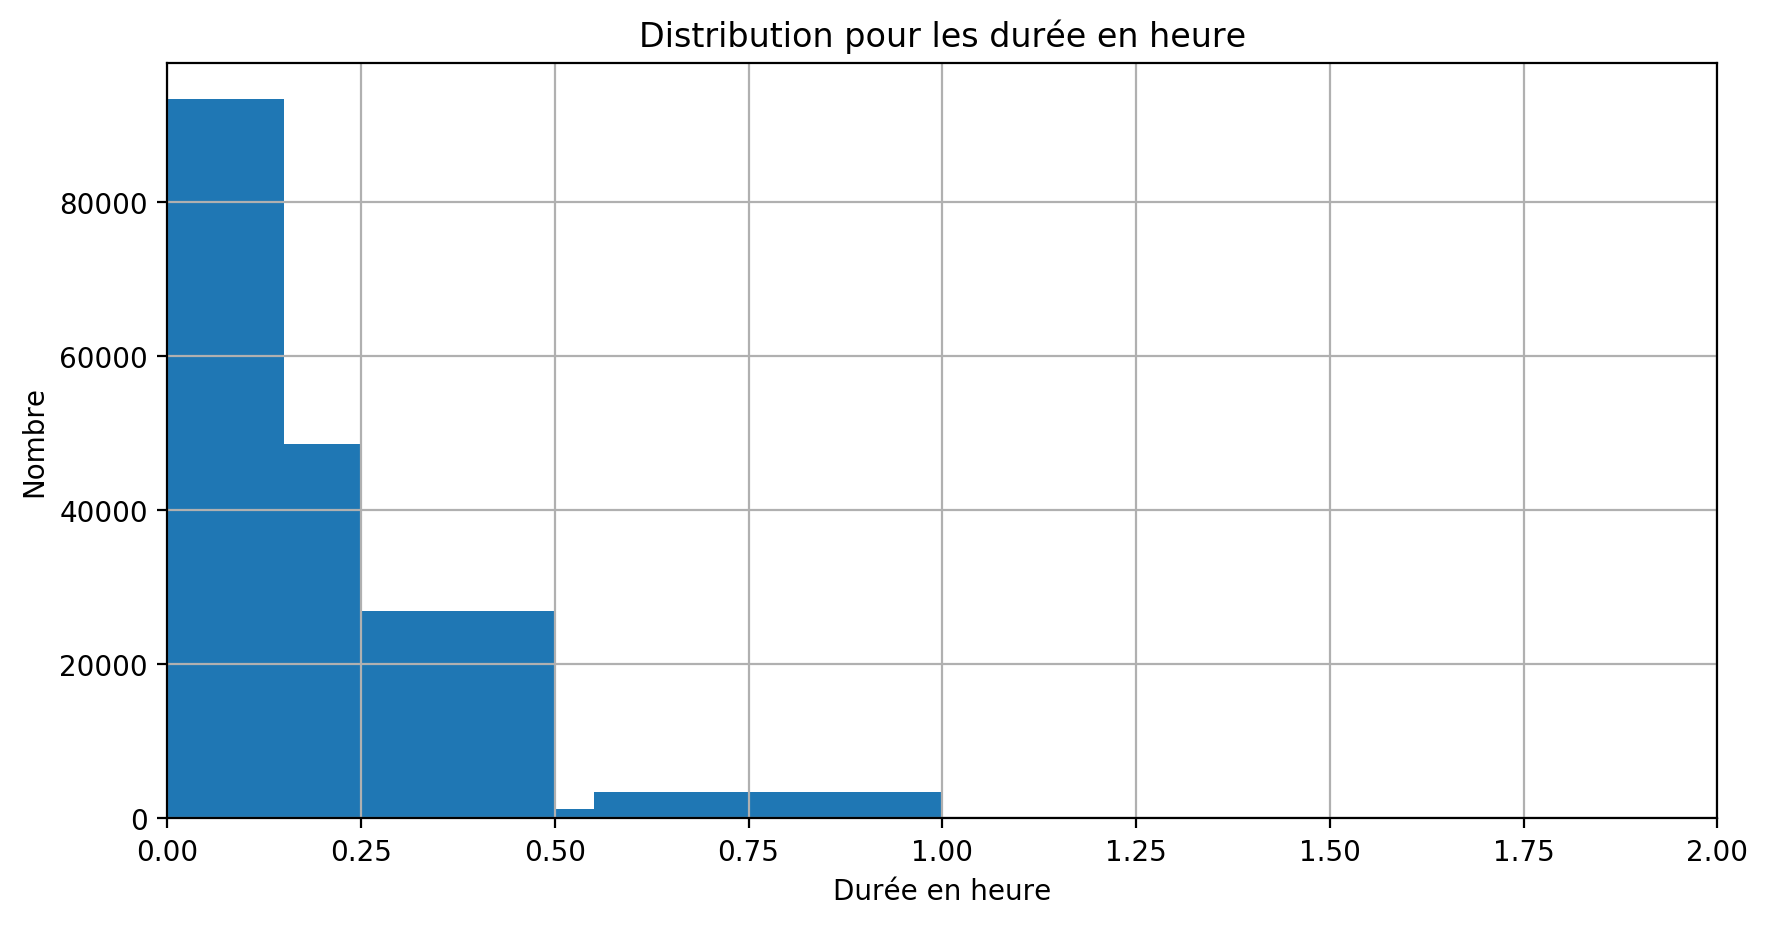

In [28]:
plt.figure(figsize = (10,5), dpi = 200)
bin_require = [0 , 0.15 ,0.25 ,0.5 ,0.55 ,1 ]
df['duration_hour'].hist(bins = bin_require)
plt.xlim(0, 2)
plt.xlabel('Durée en heure')
plt.ylabel('Nombre')
plt.title("Distribution pour les durée en heure")

plt.show()

La majorité des trajets sot de moins de 30 min

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- La plupart des utilisateurs de vélo ont environ entre 20 et 50 ans. La majorité a environ 30 ans.
- L'ensemble de données contient beaucoup d'hommes que de femmes.
- les abonnés sont plus que des clients
- La durée en minutes des trajets est pour la plupart comprise entre 3 min et 16 min ce qui signifie que la plupart des trajets durent moins de 15 minutes!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> - L'attribut d'âge que nous avons ajouté avait des valeurs aberrantes qui peuvent modifier la distribution, j'ai donc limité la tranche d'âge à moins de 85 ans.
- conversion de la durée en minutes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Quelle est la distribution du Type d'utilisateur en fonction du genre ?

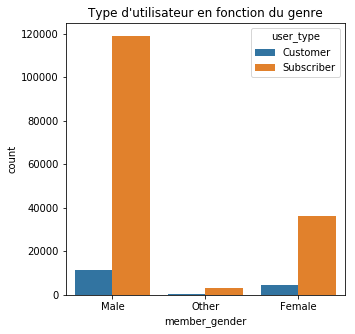

In [114]:
plt.figure(figsize = [5, 5]);

sb.countplot(data = df, x = 'member_gender', hue = 'user_type');

plt.title("Type d'utilisateur en fonction du genre");

Quelqu'en soit le genre on a plus d'abonné

### Quelle est la distribution de l'age en fonction du genre ?

Text(0.5,1,"Repartition en fonction de l'age et du genre ? ")

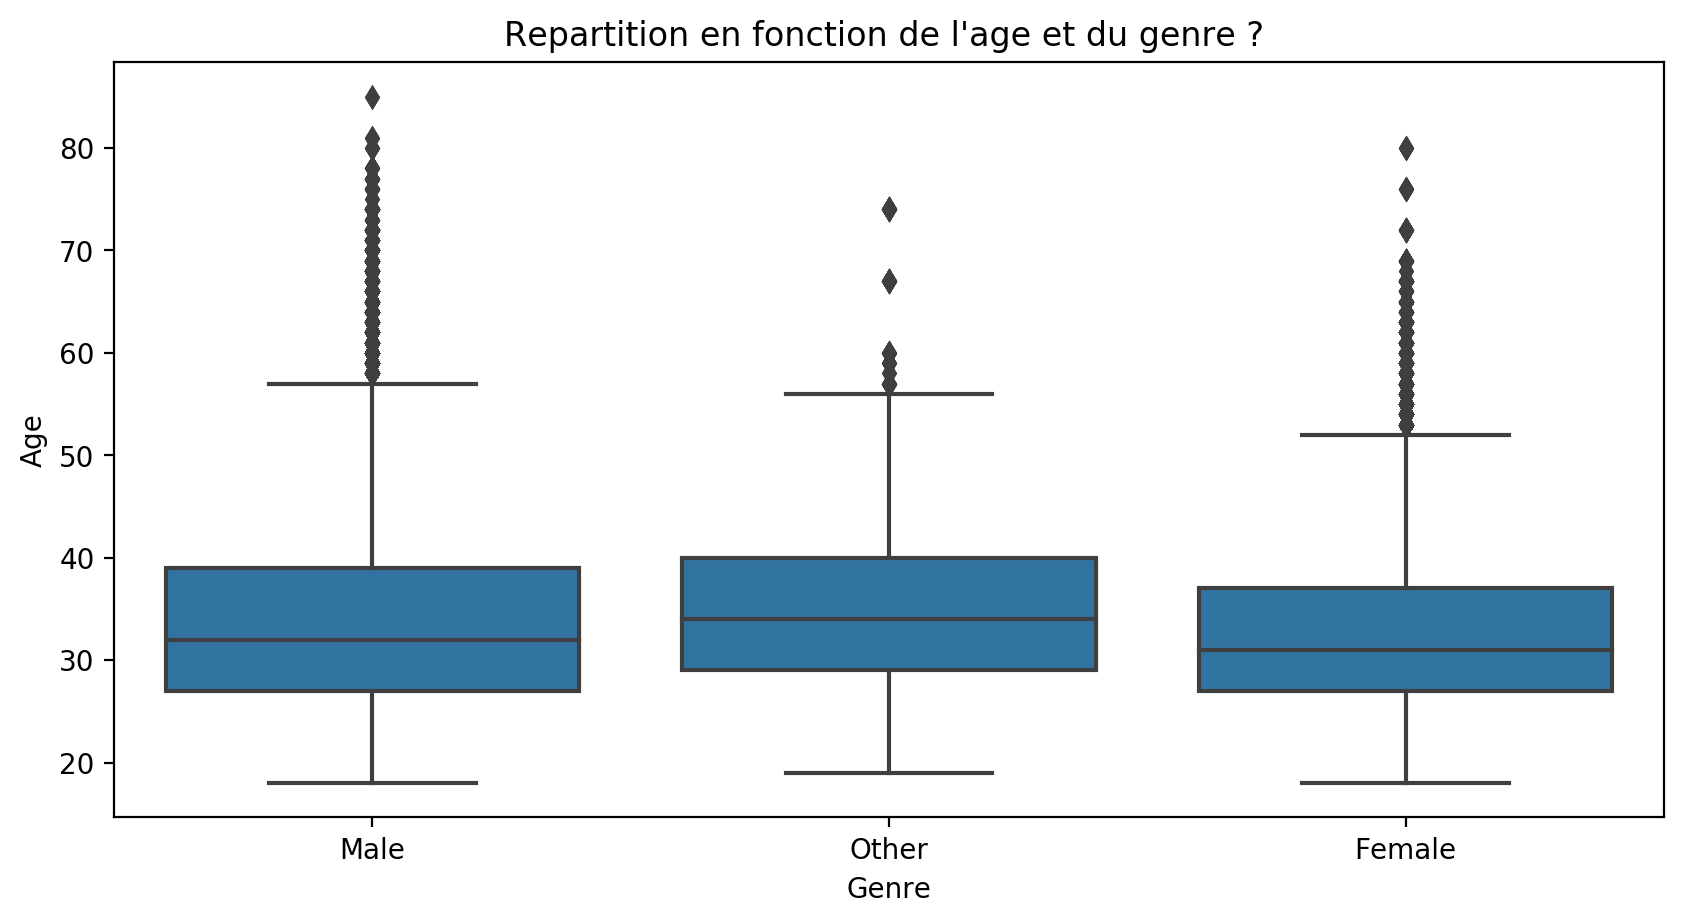

In [42]:
plt.figure(figsize = (10,5), dpi = 200)

base_color = sb.color_palette()[0]

sb.boxplot(data=df,x = "member_gender", y = "Age", color=base_color)


plt.xlabel('Genre')

plt.ylabel('Age')


plt.title("Repartition en fonction de l'age et du genre ? ")

le genre feminin prrésente plus de distribution.

### Quelle est la Durée moyenne du trajet en fonction heure de départ ?

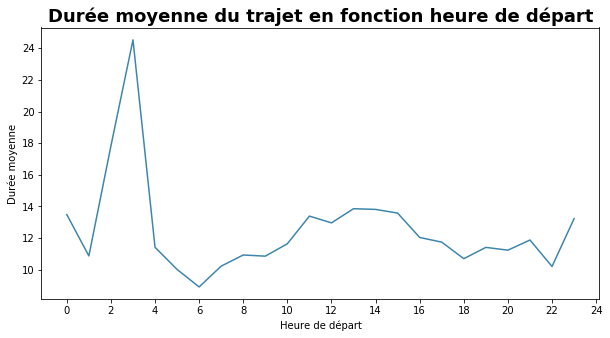

In [117]:
df.groupby('start_hour')['duration_min'].mean().plot(kind='line', figsize=(10,5) ,color='#3d85ab')
plt.title('Durée moyenne du trajet en fonction heure de départ' , fontsize=18 , fontweight='bold')
plt.ylabel('Durée moyenne')
plt.xlabel('Heure de départ')
plt.xticks([x for x in range(0,25, 2)])
plt.yticks(rotation=360);
plt.show()

La durée augmente lorsque l'heure de début du trajet se situe entre 1h du matin et 3h du matin.

### quelle est la distribution de la Durée en fonction du  type d'utilisateur ?

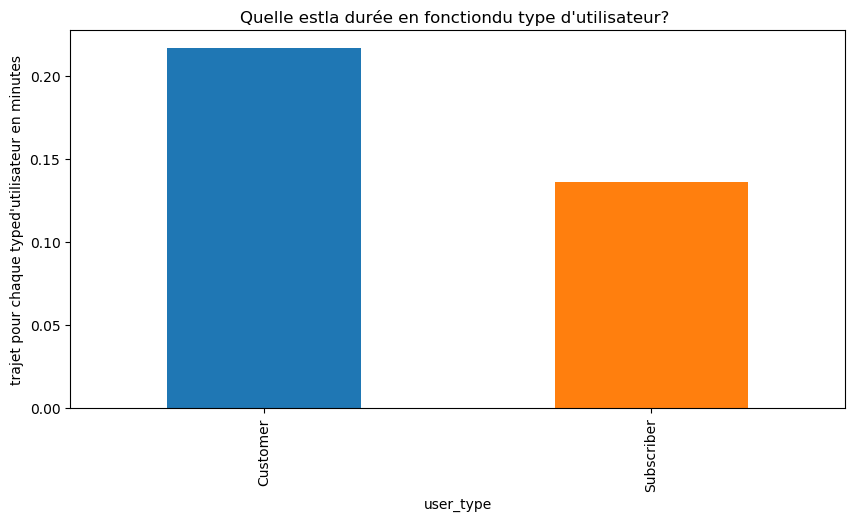

In [59]:
plt.figure(figsize = (10,5), dpi = 100)

df.groupby('user_type')['duration_min'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel("type d'utilisateur")

plt.ylabel("trajet pour chaque type d'utilisateur en minutes")


plt.title("Quelle estla durée en fonction du type d'utilisateur? ")

plt.show()


Les clients prenne plus de temps que les abonnés

### Quelle est la distribution de Durée en fonction de l'age ?

Text(0.5,1,"Durée en fonction de l'age")

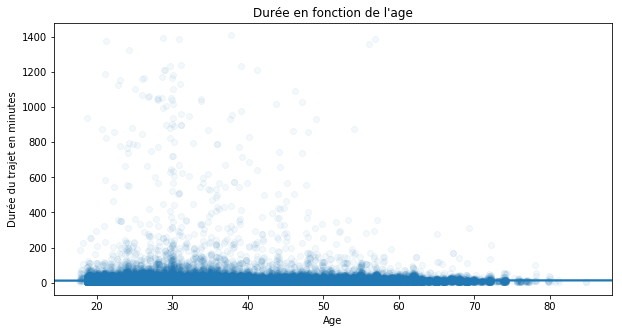

In [138]:
plt.figure(figsize=[10, 5])
sb.regplot(data = df, x = 'Age', y = 'duration_min', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.ylabel('Durée du trajet en minutes');
plt.title("Durée en fonction de l'age")

Les personnes entre 20 et 40 ans ont tendance à prendre plus de temps.

### Quelle est la distribution de la Durée en fonction du genre ?

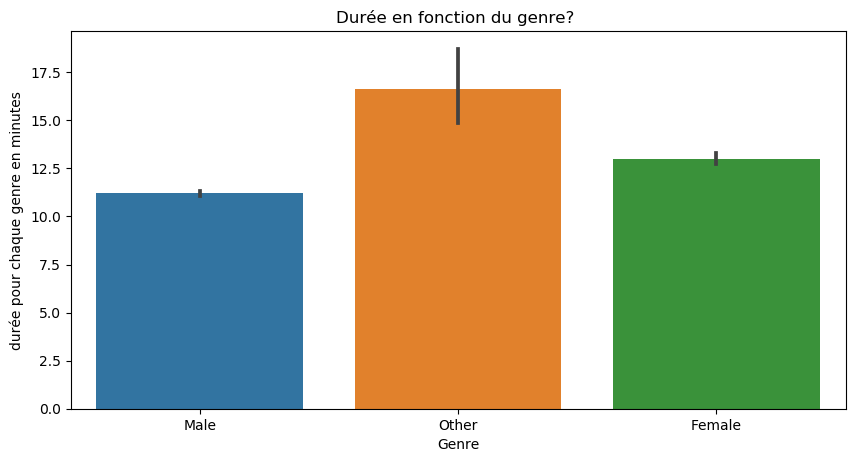

In [20]:
plt.figure(figsize = (10,5), dpi = 100)

sb.barplot(data = df, x = "member_gender", y = "duration_min")

plt.xlabel('Genre')

plt.ylabel('durée pour chaque genre en minutes')


plt.title("Durée en fonction du genre? ")

plt.show()

Les temps de trajet plus courts sont pour les utilisateurs masculins.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Quelqu'en soit le genre on a un nombre plus élévé d'abonné
- La durée augmente lorsque l'heure de début du trajet se situe entre 1 et 3.
- La relation entre la durée du voyage et l'âge est intéressante notamment parce qu'elle montre comment la durée diminue avec l'âge.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Les distributions semblent normales et logiques. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Quelle est la correlation entre lesdifférentes variables de labase de donnée ?

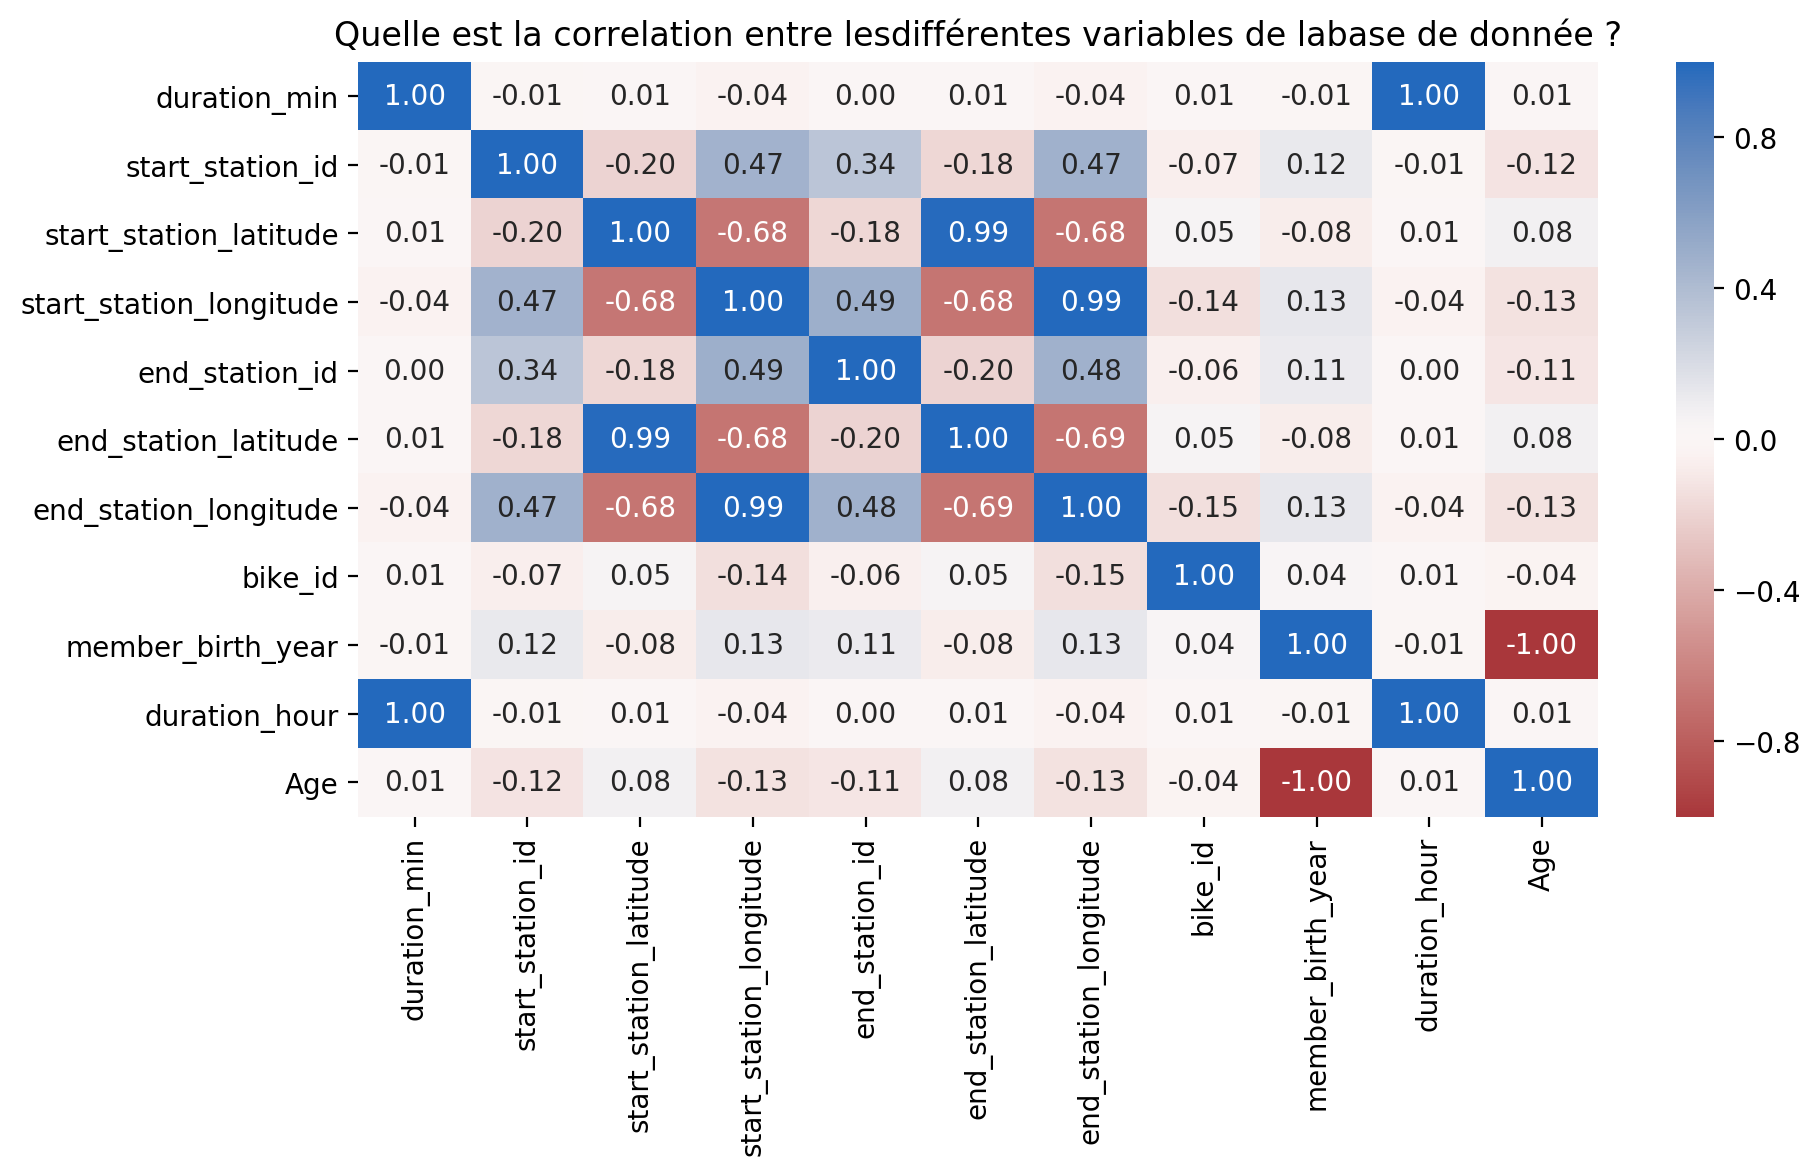

In [40]:
plt.figure(figsize = (10,5), dpi = 200)



sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

plt.title("Quelle est la correlation entre lesdifférentes variables de labase de donnée ?")


plt.xticks(rotation = 90)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()

Les graphiques ci-dessus montrent la corrélation entre chaque variable de l'ensemble de données à l'aide de cartes thermiques. 
- Il n'y a aucune corrélation pour aucune variable avec le temps (durée en secondes/minutes/heures).
- Il y a une faible corrélation entre start_station_id avec start_station_longitude et end_station_longitude, donc nous pouvons dire que l'emplacement de la station est un bon facteur et que nous pouvons l'étudier dans ma campagne de marketing.
- Il y a une forte corrélation entre la longitude de la station de départ et la longitude de la station d'arrivée, nous pouvons donc dire que l'emplacement de la station est un bon facteur et que nous devons étudier dans ma campagne de marketing.

### Quelle est la distribution de la durée en fonction de l'heure début et type d'utilisateur ?

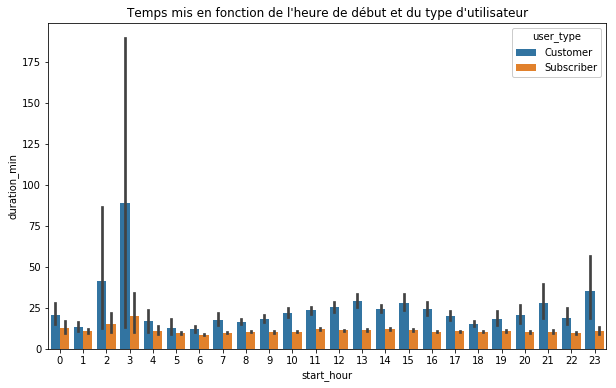

In [130]:
plt.figure(figsize=[10,6])
ax = sb.barplot(data = df, x = 'start_hour', y = 'duration_min', hue = 'user_type')
ax.legend(loc = 1, framealpha = 1, title = 'user_type')
plt.title("Temps mis en fonction de l'heure de début et du type d'utilisateur");

Les clients prenne plus de temps que les abonnés.
Entre 2 heures du matin, 3 heures du matin la durée du vélo est plus longue que n'importe quelle heure.

### Quelle est la distribution de la durée en fonction de Âge et  chaque type d'utilisateur

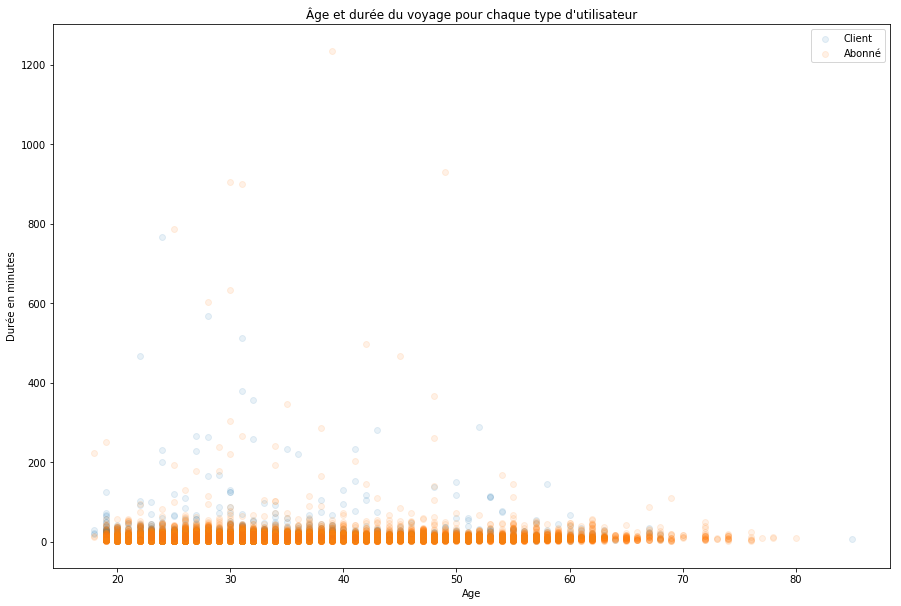

In [137]:
df1 = df.sample(20000, random_state=1)

plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df1[df1['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'Age', y = 'duration_min', alpha=2/20);
plt.legend(['Client','Abonné']);
plt.xlabel('Age');
plt.ylabel('Durée en minutes');
plt.title("Âge et durée du voyage pour chaque type d'utilisateur");

La majorité des utilisateurs plus âgés sont des abonnés et passent peu de temps dans leurs trajets à vélo. 
La durée des trajets des jeunes clients est légèrement supérieure à celle des abonnés plus jeunes.

In [140]:
#faisons une sauvegarde de la base de données df actuelle

df.to_csv('FordGoBike_traitee.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- Les clients prenne plus de temps que les abonnés. Entre 2 heures du matin, 3 heures du matin la durée du vélo est plus longue que n'importe quelle heure.
- La majorité des utilisateurs plus âgés sont des abonnés et passent peu de temps dans leurs trajets à vélo. La durée des trajets des jeunes clients est légèrement supérieure à celle des abonnés plus jeunes.

### Were there any interesting or surprising interactions between features?

> no

## Conclusions
> - La plupart des utilisateurs de vélo ont environ entre 20 et 50 ans. La majorité a environ 30 ans.
- L'ensemble de données contient beaucoup d'hommes que de femmes.
- les abonnés sont plus que des clients
- La durée en minutes des trajets est pour la plupart comprise entre 3 min et 16 min ce qui signifie que la plupart des trajets durent moins de 15 minutes!
- Quelqu'en soit le genre on a un nombre plus élévé d'abonné
- La durée augmente lorsque l'heure de début du trajet se situe entre 1h et 3h.
- La relation entre la durée du voyage et l'âge est intéressante notamment parce qu'elle montre comment la durée diminue avec l'âge.

> - Les clients prenne plus de temps que les abonnés.
- Entre 2 heures du matin, 3 heures du matin la durée du vélo est plus longue que n'importe quelle heure.
- La majorité des utilisateurs plus âgés sont des abonnés et passent peu de temps dans leurs trajets à vélo. La durée des trajets des jeunes clients est légèrement supérieure à celle des abonnés plus jeunes.




> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [50]:
#Comme mentionner ci_dessus, toutes les colonnes ne sont pas utile à notre analyse
#nous allons donc suprimer certaines colonnes

df = df.drop(['start_time','end_time','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','bike_id','member_birth_year'], axis = 1)

# load in the dataset into a pandas dataframe
df=pd.read_csv("FordGoBike_traitee.csv")

In [2]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_I_fordgobike-trip.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_fordgobike-trip.ipynb to slides
[NbConvertApp] Writing 1185882 bytes to Part_I_fordgobike-trip.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packa